In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Mount your Google Drive if your file is there
from google.colab import files
uploaded = files.upload()

Saving co2_emission.csv to co2_emission (1).csv


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('co2_emission.csv')  # Make sure the file name matches your uploaded file

# Preview the first few rows
df.head()

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [ ]:
df.info()
df = df.dropna()  # Drop missing values
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20853 entries, 0 to 20852
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Entity                          20853 non-null  object 
 1   Code                            18646 non-null  object 
 2   Year                            20853 non-null  int64  
 3   Annual CO₂ emissions (tonnes )  20853 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 651.8+ KB


Index(['Entity', 'Code', 'Year', 'Annual CO₂ emissions (tonnes )'], dtype='object')

In [ ]:
features = df[['Year']]  # Adjust to your dataset columns
target = df['Annual CO₂ emissions (tonnes )']  # Your label

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R² Score:", r2)


MAE: 271484427.29671174
MSE: 1.5966696856386476e+18
R² Score: 0.0019778644535506373


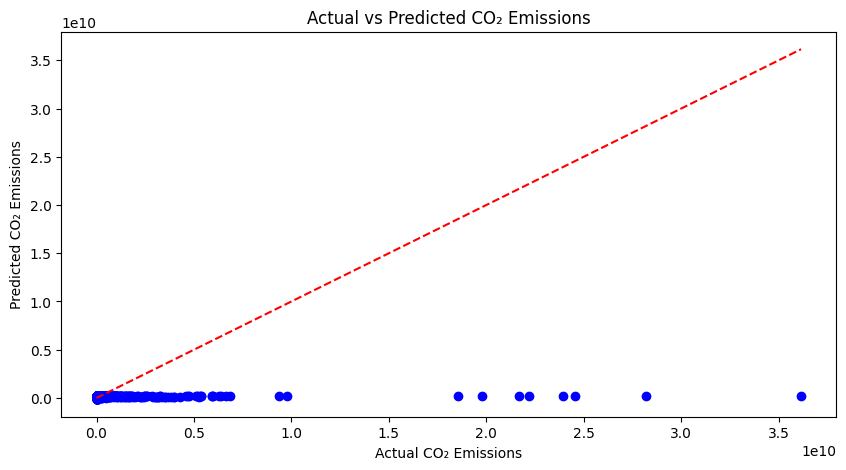

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual CO₂ Emissions')
plt.ylabel('Predicted CO₂ Emissions')
plt.title('Actual vs Predicted CO₂ Emissions')
plt.show()

## 🧠 Ethical Reflection

**1. Could there be bias in your dataset?**  
Yes. The dataset might be biased due to uneven reporting between countries, missing data, or outdated statistics. Countries with less monitoring infrastructure may underreport emissions, affecting model accuracy.

**2. Does this model promote fairness and sustainability?**  
Yes. By helping predict CO₂ emissions, this model supports SDG 13 (Climate Action). It helps governments and organizations make better decisions to reduce emissions, especially if combined with energy usage and economic data.

**3. Any potential risks?**  
Yes. Relying solely on the model without understanding local context could lead to unfair regulations or penalties. Ethical AI use requires transparency, human oversight, and fairness checks.

**4. How can it be improved?**  
- Use more diverse and complete data sources  
- Add social and economic impact features  
- Apply fairness metrics to detect prediction bias
